In [1]:
import pandas as pd
import numpy as np
import omnipath as op

/users/pravicha/.conda/envs/vs_stitcher/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
secondary = pd.read_csv('/dcs04/lieber/marmaypag/spatialNac_LIBD4125/spatial_NAc/processed-data/22_gene_risk_LR_analysis/04-Disease_LRs/Substance_dependence_LorR_interactions.csv')
liana = pd.read_csv('/dcs04/lieber/marmaypag/spatialNac_LIBD4125/spatial_NAc/processed-data/22_gene_risk_LR_analysis/01_liana/Table_LIANA_LR.csv')

In [3]:
ligands = []
receptors = []
for n in range(0,np.shape(secondary)[0]):
    if ((liana['ligand.complex']+liana['receptor.complex']).eq((secondary['genesymbol_intercell_source']+secondary['genesymbol_intercell_target']).loc[n]).sum()>0):
        ligands.append(secondary['genesymbol_intercell_source'].loc[n])
        receptors.append(secondary['genesymbol_intercell_target'].loc[n])
intersect = pd.DataFrame(np.concatenate((np.asarray(ligands).reshape(1,-1), np.asarray(receptors).reshape(1,-1)), axis = 0).T, columns = ['Ligands', 'Receptors'])

intersect.to_csv('/dcs04/lieber/marmaypag/spatialNac_LIBD4125/spatial_NAc/processed-data/22_gene_risk_LR_analysis/04-Disease_LRs/Substance_dependence_LorR_intersect_LIANA.csv')

In [4]:
db = op.interactions.import_intercell_network(transmitter_params = {"categories":"ligand"}, receiver_params = {"categories": "receptor"})
db = db[np.logical_not(db['genesymbol_intercell_source'].str.startswith('HLA'))]
db = db[np.logical_not(db['genesymbol_intercell_target'].str.startswith('HLA'))]

In [5]:
tgts = pd.read_csv('/dcs04/lieber/marmaypag/spatialNac_LIBD4125/spatial_NAc/processed-data/22_gene_risk_LR_analysis/02-OpenTarget_risk_genes/Substance_dependence_risk_genes_01thr_hot1.csv')

In [6]:
ligand_disease = []
receptor_disease = []
for m in range(0,np.shape(intersect)[0]):
    if (m==0):
        op_LRs = pd.DataFrame(db[(db['genesymbol_intercell_source']==intersect.iloc[m][0]) & (db['genesymbol_intercell_target']==intersect.iloc[m][1])]).reset_index()
        if intersect.iloc[m][0] in list(tgts['genes']):
            ligand_disease.append(True)
        else:
            ligand_disease.append(False)
        if intersect.iloc[m][1] in list(tgts['genes']):
            receptor_disease.append(True)
        else:
            receptor_disease.append(False)
    else:
        new = pd.DataFrame(db[(db['genesymbol_intercell_source']==intersect.iloc[m][0]) & (db['genesymbol_intercell_target']==intersect.iloc[m][1])]).reset_index()
        op_LRs = pd.concat([op_LRs,new], axis = 0)
        if intersect.iloc[m][0] in list(tgts['genes']):
            ligand_disease.append(True)
        else:
            ligand_disease.append(False)
        if intersect.iloc[m][1] in list(tgts['genes']):
            receptor_disease.append(True)
        else:
            receptor_disease.append(False)
op_LRs['receptor_Substance_dependence_risk'] = receptor_disease
op_LRs['ligand_Substance_dependence_risk'] = ligand_disease

/tmp/ipykernel_3652368/2787996667.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  op_LRs = pd.DataFrame(db[(db['genesymbol_intercell_source']==intersect.iloc[m][0]) & (db['genesymbol_intercell_target']==intersect.iloc[m][1])]).reset_index()
/tmp/ipykernel_3652368/2787996667.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if intersect.iloc[m][0] in list(tgts['genes']):
/tmp/ipykernel_3652368/2787996667.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by po

In [7]:
op_LRs[['genesymbol_intercell_source','genesymbol_intercell_target','receptor_Substance_dependence_risk',
       'ligand_Substance_dependence_risk',
       'index', 'source', 'target', 'is_stimulation', 'is_inhibition',
       'consensus_direction', 'consensus_stimulation', 'consensus_inhibition',
       'curation_effort', 'references', 'sources', 'type',
       'references_stripped', 'n_references', 'n_sources', 'n_primary_sources',
       'category_intercell_source', 'parent_intercell_source',
       'database_intercell_source', 'scope_intercell_source',
       'aspect_intercell_source', 'category_source_intercell_source',
       'uniprot_intercell_source', 
       'entity_type_intercell_source', 'consensus_score_intercell_source',
       'transmitter_intercell_source', 'receiver_intercell_source',
       'secreted_intercell_source',
       'plasma_membrane_transmembrane_intercell_source',
       'plasma_membrane_peripheral_intercell_source',
       'category_intercell_target', 'parent_intercell_target',
       'database_intercell_target', 'scope_intercell_target',
       'aspect_intercell_target', 'category_source_intercell_target',
       'uniprot_intercell_target', 
       'entity_type_intercell_target', 'consensus_score_intercell_target',
       'transmitter_intercell_target', 'receiver_intercell_target',
       'secreted_intercell_target',
       'plasma_membrane_transmembrane_intercell_target',
       'plasma_membrane_peripheral_intercell_target']].drop(columns = 'index').to_csv('/dcs04/lieber/marmaypag/spatialNac_LIBD4125/spatial_NAc/processed-data/22_gene_risk_LR_analysis/04-Disease_LRs/Substance_dependence_LorR_intersect_LIANA_op_annotation.csv', index = False)

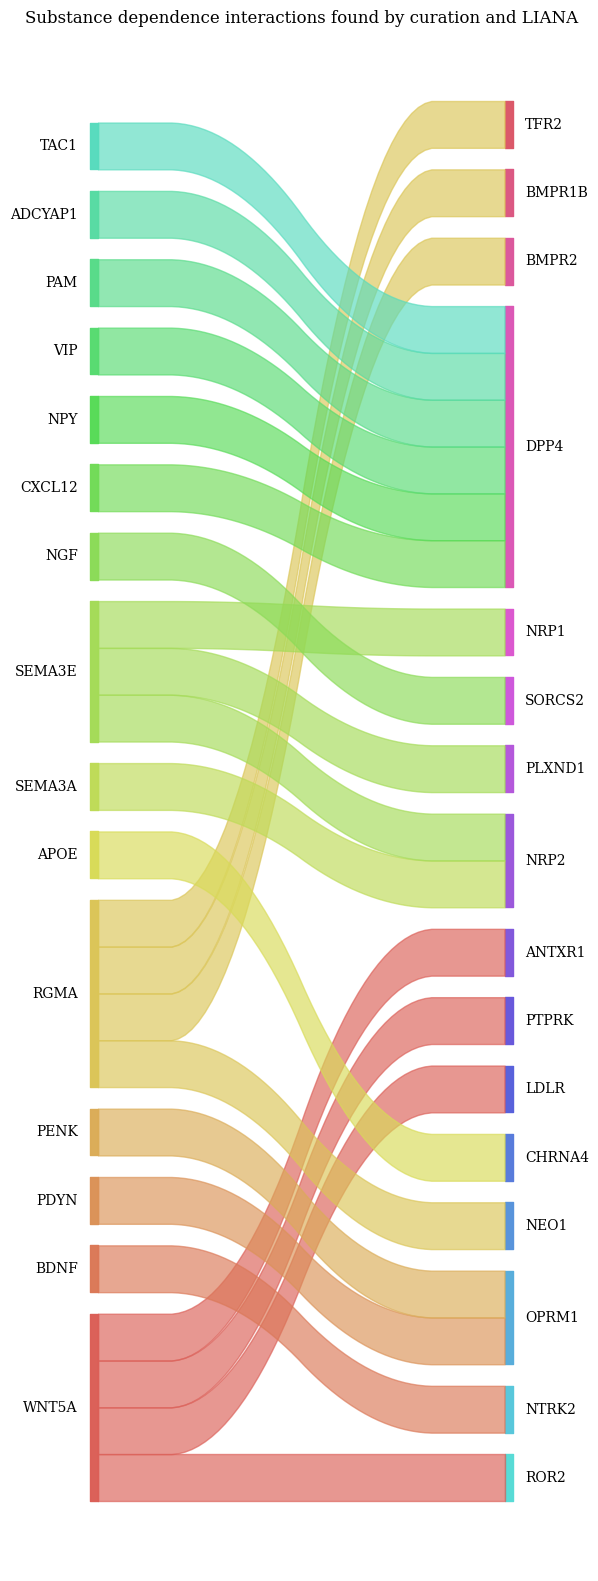

In [8]:
from pySankey import sankey as sn
import seaborn as sns
import matplotlib.pyplot as plt
sn.sankey(intersect['Ligands'], intersect['Receptors'], fontsize = 10)
fig = plt.gcf()
fig.set_size_inches(6, 20)
plt.title("Substance dependence interactions found by curation and LIANA")
plt.savefig("/dcs04/lieber/marmaypag/spatialNac_LIBD4125/spatial_NAc/plots/22_gene_risk_LR_analysis/04-Disease_LRs/interesection_interactions_Substance_dependence.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [9]:
op_LRs_subset = op_LRs[(op_LRs['ligand_Substance_dependence_risk'] == True) & (op_LRs['receptor_Substance_dependence_risk'] == True)]
if(op_LRs_subset.shape[0] > 0):
    op_LRs_subset.drop(columns = 'index').to_csv('/dcs04/lieber/marmaypag/spatialNac_LIBD4125/spatial_NAc/processed-data/22_gene_risk_LR_analysis/04-Disease_LRs/Substance_dependence_LandR_intersect_LIANA_op_annotation.csv', index = False)
    sn.sankey(op_LRs_subset['genesymbol_intercell_source'], op_LRs_subset['genesymbol_intercell_target'], fontsize = 10)
    fig = plt.gcf()
    fig.set_size_inches(6, 10)
    plt.title("Substance dependence interactions found by curation and LIANA")
    plt.savefig("/dcs04/lieber/marmaypag/spatialNac_LIBD4125/spatial_NAc/plots/22_gene_risk_LR_analysis/04-Disease_LRs/interesection_interactions_Substance_dependence_both_LandR.pdf", dpi=300, bbox_inches='tight')
    plt.show()